In [1]:
import requests
import json
import numpy as np

URL = "http://modelmesh-serving:8008/v2/models/stocks/infer"

X = np.random.uniform(low=100.1, high=125.1, size=(69, 60, 1))

payload = {
    "inputs": [
        {
            "name": "lstm_input",
            "shape": [69, 60, 1],
            "datatype": "FP32",
            "data": X.tolist(),
        },
    ]
}
headers = {"content-type": "application/json"}

response = requests.post(URL, json=payload, headers=headers)
print(response.json())
predicted_stock_price = response.json()['outputs'][0]['data']


{'model_name': 'stocks__isvc-286d8ce264', 'model_version': '1', 'outputs': [{'name': 'dense', 'datatype': 'FP32', 'shape': [69, 1], 'data': [2.0164652, 2.0164154, 2.0167215, 2.016693, 2.0166576, 2.0166047, 2.016578, 2.0165908, 2.0166688, 2.016273, 2.0164478, 2.0165207, 2.0166237, 2.016398, 2.0164952, 2.016477, 2.0164235, 2.0164325, 2.016588, 2.0165498, 2.016684, 2.016493, 2.0165424, 2.016318, 2.0166254, 2.0164828, 2.016377, 2.016581, 2.0164332, 2.016524, 2.0164962, 2.0165594, 2.016384, 2.0165906, 2.0163803, 2.0162308, 2.0164163, 2.0164866, 2.016371, 2.0166175, 2.016555, 2.0164945, 2.0165038, 2.0164628, 2.0163548, 2.0164812, 2.0163426, 2.0165114, 2.0163968, 2.016527, 2.0164, 2.0165412, 2.0165102, 2.016527, 2.0165865, 2.016488, 2.016611, 2.0165374, 2.0163577, 2.016457, 2.0164626, 2.0166392, 2.0164444, 2.0165122, 2.0165477, 2.0168226, 2.0164182, 2.0165133, 2.0165792]}]}


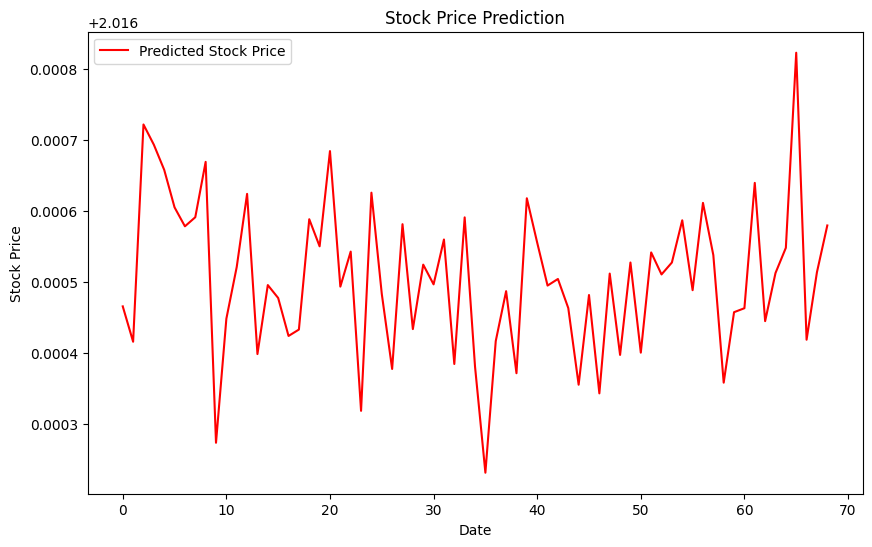

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(
    predicted_stock_price, color="red", label="Predicted Stock Price"
)
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()